# Buildings Dataset

## 1. Data Import - Building Dataset<a id='1'></a>

We will first import the building dataset into our notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
path = '../data/building/'
file_name = 'building.csv'
full_path = path + file_name

building_df = pd.read_csv(full_path)
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1615 non-null   object 
 5   sub_primaryspaceusage  1615 non-null   object 
 6   sqm                    1636 non-null   float64
 7   sqft                   1636 non-null   float64
 8   lat                    1399 non-null   float64
 9   lng                    1399 non-null   float64
 10  timezone               1636 non-null   object 
 11  electricity            1578 non-null   object 
 12  hotwater               185 non-null    object 
 13  chilledwater           555 non-null    object 
 14  steam                  370 non-null    object 
 15  wate

In [5]:
building_df.shape

(1636, 32)

Data confirmed that we indeed have 1,636 buildings in our dataset. We can also observe each building has their "sqm" and "timezone" information. 1,578 buildings have electricity installed. Half of the buildings have "yearbuilt" information.

In [6]:
building_df.head(1).T

,0
building_id,Panther_lodging_Dean
site_id,Panther
building_id_kaggle,NaN
site_id_kaggle,0.0
primaryspaceusage,Lodging/residential
sub_primaryspaceusage,Residence Hall
sqm,508.8
sqft,5477.0
lat,28.517689
lng,-81.379039


## 2. Target Location Selection<a id='2'></a>

As mentioned previously, we are only interested in buildings that are in the climate zone "5B - 6A". Base on research on latitude and longitude data, we found that the buildings in the following "site_id" are in our target timezone: "Moose (Ottawa, Ontario)", "Crow (Ottawa, Ontario)", "Hog (Minneapolis, Minnesota)", "Cockatoo (Cornell, New York)". We will pick them out from our data.

In [7]:
target_sites = ['Moose', 'Crow', 'Hog', 'Cockatoo']
building_df = building_df[building_df.site_id.isin(target_sites)]

#replace site_id with real location's name
building_df = building_df.replace(to_replace='Moose', value='Ottawa')
building_df = building_df.replace(to_replace='Crow', value='Ottawa')
building_df = building_df.replace(to_replace='Hog', value='Minneapolis')
building_df = building_df.replace(to_replace='Cockatoo', value='Cornell')

#modify column name
building_df.rename(columns={'building_id_kaggle':'building_id_n','site_id_kaggle':'site_id_n'},inplace=True)

building_df = building_df.drop(columns='building_id')
building_df.shape

(307, 31)

The target dataset includes 307 buildings.

In [8]:
building_df.head(10).T

,916,917,918,919,920,921,922,923,924,925
site_id,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa
building_id_n,789.0,790.0,791.0,792.0,793.0,794.0,795.0,796.0,797.0,798.0
site_id_n,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
primaryspaceusage,Education,Education,Education,Education,Education,Education,Education,Education,Education,Education
sub_primaryspaceusage,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom,College Classroom
sqm,6000.0,8000.0,14000.0,31000.0,14000.0,67999.9,35999.9,21000.0,70999.9,37999.9
sqft,64583.0,86111.0,150695.0,333681.0,150695.0,731945.0,387500.0,226042.0,764237.0,409028.0
lat,45.4215,45.4215,45.4215,45.4215,45.4215,45.4215,45.4215,45.4215,45.4215,45.4215
lng,-75.6972,-75.6972,-75.6972,-75.6972,-75.6972,-75.6972,-75.6972,-75.6972,-75.6972,-75.6972
timezone,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern,US/Eastern


## 3.0 Data Understanding<a id='3'></a>

Before we jump into summarizing missing data. We use the information below to develop a understanding of our data. The information is from the data publisher.

- building_id_n: building ID used for the Kaggle competition (numeric).
- site_id_n: site ID used for the Kaggle competition (numeric).
- primaryspaceusage: Primary space usage of all buildings is mapped using the energystar scheme building description types.
- sub_primaryspaceusage: energystar scheme building description types subcategory.
- sqm: Floor area of building in square meters (m2).
- lat: Latitude of building location to city level.
- lng: Longitude of building location to city level.
- timezone: site's timezone.
- electricity: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- hotwater: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- chilledwater: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- steam: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- water: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- irrigation: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- solar: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- gas: presence of this kind of meter in the building. Yes if affirmative, NaN if negative.
- industry: Industry type corresponding to building.
- subindustry: More detailed breakdown of Industry type corresponding to building.
- heatingtype: Type of heating in corresponding building.
- yearbuilt: Year corresponding to when building was first constructed, in the format YYYY.
- date_opened: Date building was opened for use, in the format D/M/YYYY.
- numberoffloors: Number of floors corresponding to building.
- occupants: Usual number of occupants in the building.
- energystarscore: Rating of building corresponding to building energystar scheme (Energy Star Score).
- eui: Energy use intensity of the building (kWh/year/m2).
- site_eui: Energy (Consumed/Purchased) use intensity of the site (kWh/year/m2).
- source_eui: Total primary energy consumption normalized by area (Takes into account conversion efficiency of primary energy into secondary energy).
- leed_level: LEED rating of the building (Leadership in Energy and Environmental Design), most widely used green building rating system.
- rating: Other building energy ratings.

In [9]:
building_df.shape

(307, 31)

### 3.1 Missing Values<a id='3.1'></a>

In [10]:
missing_sum = building_df.isnull().sum()
missing_percentage = building_df.isnull().mean() * 100

missing_df = pd.concat([missing_sum, missing_percentage], axis=1)
missing_df.columns = ['missing_count','%']
missing_df = missing_df.sort_values('missing_count', ascending=False)
missing_df.round(2)

,missing_count,%
irrigation,307,100.00
water,307,100.00
leed_level,307,100.00
date_opened,307,100.00
heatingtype,307,100.00
gas,307,100.00
solar,307,100.00
rating,307,100.00
occupants,300,97.72
hotwater,297,96.74


### 3.2 Meter Type Observation <a id='3.2'></a>

There are 8 types of energy meters potentially installed for each building: **electricity, hotwater, chilledwater, steam, water, irrigation, solar, gas**. We will first investigate how many energy meters are installed for 307 buildings

In [11]:
meter_list = ['electricity','hotwater','chilledwater','steam', 'water','irrigation','solar','gas']
meter_df = building_df[meter_list]
meter_sum = meter_df.notnull().sum()
meter_sum = pd.DataFrame(meter_sum)
meter_sum.columns = ['count']
meter_sum = meter_sum.sort_values('count',ascending=False)

In [12]:
meter_sum['category'] = meter_sum.index
meter_sum

,count,category
electricity,287,electricity
steam,201,steam
chilledwater,178,chilledwater
hotwater,10,hotwater
water,0,water
irrigation,0,irrigation
solar,0,solar
gas,0,gas


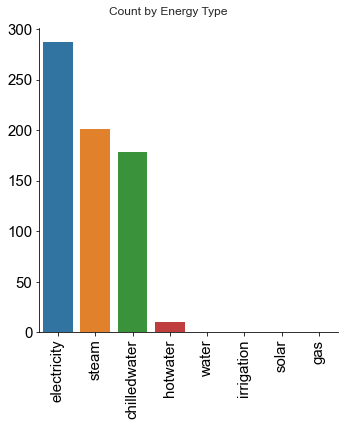

In [13]:
# plot in a horizontal bar chart

def create_barchat(dataframe, x_column, y_column, g_type, title):
    g = sns.catplot(x=x_column,
                     y=y_column,
                     data=dataframe,
                     kind=g_type)
    sns.set_style('darkgrid')
    
    g.fig.suptitle(title, y=1.02)
    g.set(xlabel=None, ylabel=None)
    
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)

title = 'Count by Energy Type'
create_barchat(meter_sum, 'category', 'count', 'bar', title)

Base on our observation, there are **gas, solar, irrigation, water** meters installed for our target buildings. A building can have different types of energy meter installed. Electrical meters is the most popular meters among all buildings. Our concern and objective of the project is to understand the TOTAL energy consumption of a building, based on initial observation of energy data, all total energy consumption for each building in each hour is provided, so it is safe to say that are not going to use the meter type data in our analysis. They can be removed from the dataset.